In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import seaborn as sns

from data_loader import (
    get_users_df,
    get_reviews_df,
    get_beers_df,
    get_breweries_df,
    join_breweries_on_beers,
    merge_reviews,
)

In [23]:
reviews_path_ba = "data/matched_beer_data/ratings_ba.txt"
reviews_path_rb = "data/matched_beer_data/ratings_rb.txt"
users_path_ba = "data/users_ba.csv"
users_path_rb = "data/users_rb.csv"
breweries_path = "data/matched_beer_data/breweries.csv"
beers_path = "data/matched_beer_data/beers.csv"

# Seeing the world through the lens of beer reviews


Beers are produced and consumed in every part of the world. One can thus wonder how beers around the world are perceived by different cultures. The interest of this project is to look into how beers from each country of production are judged and how specific countries judge others. As a side note, we will finally answer an age-old question : Are German beers actually good ?

On the one hand, we want to explore how a country’s beers are perceived both quantitatively and qualitatively. On the other hand, we will analyze the users’ ratings and look for significant patterns in how distinct countries rate other countries. For both of these analyses, we will dissect both the ratings and reviews to understand the feelings of the users. These findings will also be mapped to their climate to see if there is a correlation between a countries’ beer rating and the climate of said country. 


## 1) Loading data 

- All the pre-processing is done using the functions defined in `data_loader.py`.
- The preprocessing functions are described and documented in `data_loader.py`.
- We use the reviews/ ratings from both BeerAdvocate and RateBeer, and use the matched beers and breweries dataset to make sure that the names of the same beers are identical across the two datasets.
- Those two reviews/ ratings datasets are then merged and joined to the breweries, beers and users datasets to obtain a single complete dataframe of beer reviews.



In [24]:
users_df_ba = get_users_df(users_path_ba)
users_df_rb = get_users_df(users_path_rb)
ba_df = get_reviews_df(reviews_path_ba)
rb_df = get_reviews_df(reviews_path_rb)
breweries_df = get_breweries_df(breweries_path)
beers_df = get_beers_df(beers_path)
beers_df = join_breweries_on_beers(beers_df, breweries_df)
reviews_df = merge_reviews(ba_df, rb_df, beers_df, users_df_ba, users_df_rb)

## User dataframe (The user dataframe are similar for both platforms)

In [25]:
users_df_ba.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland




1. **nbr_ratings**: Number of beer ratings by users.
2. **nbr_reviews**: Count of beer reviews submitted.
3. **user_id**: Unique identifier for users.
4. **user_name**: Usernames associated with users.
5. **joined**: Date when users joined the platform.
6. **location**: Geographical location of users.

## Breweries dataframe

In [26]:
breweries_df.head()

,brewery_id_ba,brewery_location_ba,brewery_name_ba,brewery_nbr_beers_ba,brewery_id_rb,brewery_nbr_beers_rb
0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,5
1,32848,Northern Ireland,The Sheelin Brewery,4,17616,2
2,40360,Northern Ireland,Walled City Brewing Company,6,24866,3
3,40309,Northern Ireland,Ards Brewing Company,7,13538,13
4,41205,Northern Ireland,Barrahooley Brewery,3,22304,4


1. **brewery_id_ba**: Unique identifier for breweries on BeerAdvocate.
2. **brewery_location_ba**: Geographical location of breweries on BeerAdvocate.
3. **brewery_name_ba**: Names of breweries on BeerAdvocate.
4. **brewery_nbr_beers_ba**: Number of beers associated with each brewery on BeerAdvocate.
5. **brewery_id_rb**: Unique identifier for breweries on RateBeer.
6. **brewery_nbr_beers_rb**: Number of beers associated with each brewery on RateBeer.

## Beers dataframe (enriched with data from breweries dataframe)

- The rows contain the different beers rated on the two platforms

In [27]:
beers_df.head()

,abv_ba,beer_avg_rating_ba,beer_id_ba,beer_name_ba,brewery_id_ba,nbr_ratings_ba,style_ba,beer_avg_rating_rb,beer_id_rb,brewery_id_rb,nbr_ratings_rb,beer_avg_rating_ba_rb,brewery_location_ba,brewery_name_ba,brewery_nbr_beers_ba,brewery_nbr_beers_rb
0,4.8,3.439867,19827,Legbiter,10093,75,English Pale Ale,2.923596,37923,4959,89,3.159695,Northern Ireland,Strangford Lough Brewing Company Ltd,5,5
1,6.0,3.888750,20841,St. Patrick's Ale,10093,8,English Pale Ale,3.290909,41286,4959,11,3.542632,Northern Ireland,Strangford Lough Brewing Company Ltd,5,5
2,4.2,3.556094,20842,St. Patrick's Best,10093,64,English Bitter,2.831081,41287,4959,74,3.167319,Northern Ireland,Strangford Lough Brewing Company Ltd,5,5
3,4.8,3.960000,22659,St. Patrick's Gold,10093,1,American Pale Wheat Ale,2.775000,41285,4959,4,3.012000,Northern Ireland,Strangford Lough Brewing Company Ltd,5,5
4,4.5,NaN,178681,Sheelin Stout,32848,0,Irish Dry Stout,3.200000,230283,17616,2,NaN,Northern Ireland,The Sheelin Brewery,4,2


1. **abv_ba**: Alcohol by volume on BeerAdvocate.
2. **beer_avg_rating_ba**: Average rating on BeerAdvocate.
3. **beer_id_ba**: Unique identifier of the beer on BeerAdvocate.
4. **beer_name_ba**: Names of the beer on BeerAdvocate.
5. **brewery_id_ba**: Unique identifier for the brewery that makes the beer on BeerAdvocate
6. **nbr_ratings_ba**: Number of ratings of the beer on BeerAdvocate.
7. **style_ba**: Beer style on BeerAdvocate.
8. **beer_avg_rating_rb**: Average rating of the beer on RateBeer.
9. **beer_id_rb**: Unique identifier of the beer on RateBeer.
10. **brewery_id_rb**: Unique identifier for the brewery that makes the beer on RateBeer.
11. **nbr_ratings_rb**: Number of ratings of the beer on RateBeer.
12. **beer_avg_rating_ba_rb**: Average rating of the beer on both BeerAdvocate and RateBeer (weighted by number of reviews on both platforms)
13. **brewery_location_ba**: Geographical location of breweries on BeerAdvocate.
14. **brewery_name_ba**: Name of the brewery that makes the beer on BeerAdvocate.
15. **brewery_nbr_beers_ba**: Number of beers associated with the brewery that makes the specific beer on BeerAdvocate.
16. **brewery_nbr_beers_rb**: Number of beers associated with the brewery that makes the specific beer on RateBeer.

## Complete reviews dataframe

In [28]:
reviews_df.sample(n=5)

,beer_name,beer_id,style,date,user_name,user_id,appearance,aroma,palate,taste,...,beer_id_rb,brewery_id_rb,nbr_ratings_rb,beer_avg_rating_ba_rb,brewery_location,brewery_name,brewery_nbr_beers_ba,brewery_nbr_beers_rb,user_location,user_nbr_ratings
914530,Rochefort Trappistes 10,2360,Abt/Quadrupel,1214733600,drewbeerme,19069,5,9,4,8,...,2360,406,5272,4.437992,Belgium,Brasserie de Rochefort,3,3,"United States, Illinois",2894.0
243259,Citizen Pacifist Winter Porter,445458,Spice/Herb/Vegetable,1472378400,Beerclubsa,425172,4,7,4,8,...,445458,14762,5,NaN,South Africa,Citizen Beer,6,6,South Africa,144.0
861062,Native Amber Red IPA,48720,American Amber / Red Ale,1391943600,Spike-likes-beer,spike-likes-beer.702543,nan,nan,nan,nan,...,100087,10276,82,3.739963,"United States, Oklahoma",COOP Ale Works,34,64,"United States, Oklahoma",394.0
738736,Kingpin Double Red Ale,64798,American Amber / Red Ale,1336816800,MrBillyMac,mrbillymac.660286,nan,nan,nan,nan,...,136083,21,340,3.442963,"United States, Oregon",BridgePort Brewing Co. / Brewpub,72,70,"United States, California",71.0
810596,Prairie Madness Pale Ale,119579,American Pale Ale (APA),1407405600,NickyPogs,nickypogs.688883,nan,nan,nan,nan,...,259304,17687,21,3.852692,"United States, Illinois",Hailstorm Brewing Co.,103,110,"United States, Illinois",782.0


1. **beer_name**: Name of the rated beer.
2. **beer_id**: Unique identifier for the rated beer.
3. **style**: Style of the rated beer.
4. **date**: Date of the rated review.
5. **user_name**: Name of the user providing the rated review.
6. **user_id**: Unique identifier for the user.
7. **appearance**: Rating for the appearance of the rated beer.
8. **aroma**: Rating for the aroma of the rated beer.
9. **palate**: Rating for the palate of the rated beer.
10. **taste**: Rating for the taste of the rated beer.
12. **rating**: Rating given by the user to the beer
13. **text**: Textual content of the rated review.
15. **abv**: Alcohol by volume for the rated beer.
16. **beer_avg_rating_ba**: Average rating for the rated beer on BeerAdvocate.
17. **beer_id_ba**: Unique identifier for the rated beer on BeerAdvocate.
18. **brewery_id_ba**: Unique identifier for the brewery associated with the rated beer on BeerAdvocate.
19. **nbr_ratings_ba**: Number of ratings for the rated beer on BeerAdvocate.
20. **beer_avg_rating_rb**: Average rating for the rated beer on RateBeer.
21. **beer_id_rb**: Unique identifier for the rated beer on RateBeer.
22. **brewery_id_rb**: Unique identifier for the brewery associated with the rated beer on RateBeer.
23. **nbr_ratings_rb**: Number of ratings for the rated beer on RateBeer.
24. **beer_avg_rating_ba_rb**: Average rating for the rated beer on both BeerAdvocate and RateBeer.
25. **brewery_location**: Geographical location of the brewery associated with the rated beer.
26. **brewery_name**: Name of the brewery associated with the rated beer.
27. **brewery_nbr_beers_ba**: Number of beers associated with the brewery of the rated beer on BeerAdvocate.
28. **brewery_nbr_beers_rb**: Number of beers associated with the brewery of the rated beer on RateBeer.
29. **user_location**: Geographical location of the user.
30. **user_nbr_ratings**: Number of ratings provided by the user.

# Missing values

- A few columns have a large number of missing values:
    - The appearance/aroma/palate/taste/overall: have a large number of nan because users are not forced to add ratings of every beer aspect to their reviews
    - The text is also not mandatory
    - The user location is not always available
    

- We only drop the nan when necessary, before each analysis.

In [29]:
reviews_df.isna().sum()

beer_name                      0
beer_id                        0
style                          0
date                           0
user_name                      0
user_id                        0
appearance                     0
aroma                          0
palate                         0
taste                          0
overall                        0
rating                         0
text                           0
review                   1020638
abv                            0
beer_avg_rating_ba         28350
beer_id_ba                     0
brewery_id_ba                  0
nbr_ratings_ba                 0
style                          0
beer_avg_rating_rb          5062
beer_id_rb                     0
brewery_id_rb                  0
nbr_ratings_rb                 0
beer_avg_rating_ba_rb      33412
brewery_location               0
brewery_name                   0
brewery_nbr_beers_ba           0
brewery_nbr_beers_rb           0
user_location              81495
user_nbr_r

## 2) First analysis : how beers from one country are rated (reviewed)

We first want to look at how beers from a given country are perceived by users. We start from the full dataframe with all the reviews.

### Data cleaning

Let's first look at distribution of number of reviews

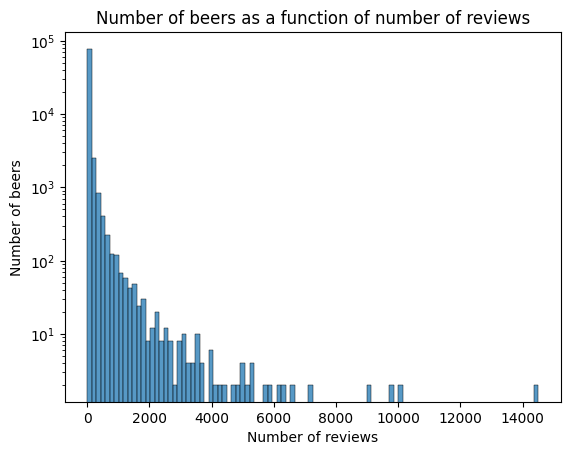

In [69]:
# Copy the dataset to avoid modifying the original
country_ratings = reviews_df.copy()

# Plot number of beers as a function of number of reviews
country_ratings["nbr_ratings"] = (
    country_ratings["nbr_ratings_rb"] + country_ratings["nbr_ratings_ba"]
)
unique_beers = country_ratings[["beer_id", "nbr_ratings"]].copy().drop_duplicates()

sns.histplot(data=unique_beers, x="nbr_ratings", bins=100)
plt.yscale("log")
plt.xlabel("Number of reviews")
plt.ylabel("Number of beers")
plt.title("Number of beers as a function of number of reviews")
plt.show()

We notice that a great number of beers have very few reviews, which might lead to biased results. We therefore decide to only keep beers with more than 10 reviews.

In [31]:
# Keep initial length for comparison
initial_len = len(reviews_df)
print("Number of unique beers initially: ", len(reviews_df["beer_id"].unique()))

# Keep the reviews only for beers with at least 10 reviews
country_ratings = country_ratings[country_ratings["nbr_ratings"] >= 10]

intermediate_len = len(country_ratings)

print(
    "Number of unique beers after filtering: ", len(country_ratings["beer_id"].unique())
)
print(
    "Percentage of reviews kept: {:.2f} %".format(intermediate_len / initial_len * 100)
)

Number of unique beers initially:  79628


Number of unique beers after filtering:  42665
Percentage of reviews kept: 95.25 %


Notice how we lose less than 5% reviews despite removing ~50% of the beers. That way the analysis we will do on each beer will be more robust.

Similarly, we remove every countries with less than 10 beers.

In [32]:
# We will now compute for each location the number of beer reviewed
num_unique_beers = country_ratings.groupby("brewery_location")["beer_id"].nunique()
num_unique_beers = num_unique_beers.to_frame().reset_index()
num_unique_beers.columns = ["brewery_location", "num_unique_beers"]

print("Number of countries initially: ", len(reviews_df["brewery_location"].unique()))

# Keep only the countries with at least 10 unique beers
country_ratings = country_ratings.merge(num_unique_beers, on="brewery_location")
country_ratings = country_ratings[country_ratings["num_unique_beers"] >= 10]

print(
    "Number of countries after filtering: ",
    len(country_ratings["brewery_location"].unique()),
)
final_len = len(country_ratings)

print("Initial number of reviews: ", initial_len)
print("Final number of reviews: ", final_len)
print("Percentage of reviews kept: {:.2f}%".format(final_len / initial_len * 100))

Number of countries initially:  174
Number of countries after filtering:  109
Initial number of reviews:  1976606
Final number of reviews:  1878458
Percentage of reviews kept: 95.03%


At the end, we keep 95% of the original dataset for this analysis which is a good compromise to have significant results.

### Analysis

We want to take a first look at the average ratings of beers from different countries. We use the average rating of each beer for now, it is itself the average across the 5 different scores (Overall, Taste, Palate, Aroma, and Appearance).

We noticed first that the United States are separated by states, so regrouped them. We do the same for the United Kingdom, which is separated by countries.

Then, we can compute the average rating for every beers coming from the same brewery_location (ie country of origin).

In [33]:
# Convert the rating column to float
country_ratings["rating"] = country_ratings["rating"].astype(float)

filtered_country_ratings = country_ratings.copy()
# Replace the country names by the official names
filtered_country_ratings.loc[
    filtered_country_ratings["brewery_location"].str.contains("United States"),
    "brewery_location",
] = "United States of America"

filtered_country_ratings.loc[
    filtered_country_ratings["brewery_location"].str.contains("England"),
    "brewery_location",
] = "United Kingdom"
filtered_country_ratings.loc[
    filtered_country_ratings["brewery_location"].str.contains("Scotland"),
    "brewery_location",
] = "United Kingdom"
filtered_country_ratings.loc[
    filtered_country_ratings["brewery_location"].str.contains("Wales"),
    "brewery_location",
] = "United Kingdom"
filtered_country_ratings.loc[
    filtered_country_ratings["brewery_location"].str.contains("Northern Ireland"),
    "brewery_location",
] = "United Kingdom"

# For each country compute the average rating
avg_ratings = filtered_country_ratings.groupby("brewery_location")["rating"].mean()
avg_ratings = avg_ratings.to_frame().reset_index()
avg_ratings.columns = ["brewery_location", "avg_rating"]

avg_ratings.head()

,brewery_location,avg_rating
0,Argentina,3.252430
1,Australia,3.274803
2,Austria,3.309164
3,Bahamas,2.727022
4,Belgium,3.741002


Using geopandas, we can get a map from the world by country. We can then plot the average rating for each country on this map.

/var/folders/0g/yd41q8010pn2lvl2qx960v240000gn/T/ipykernel_7236/3171815050.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


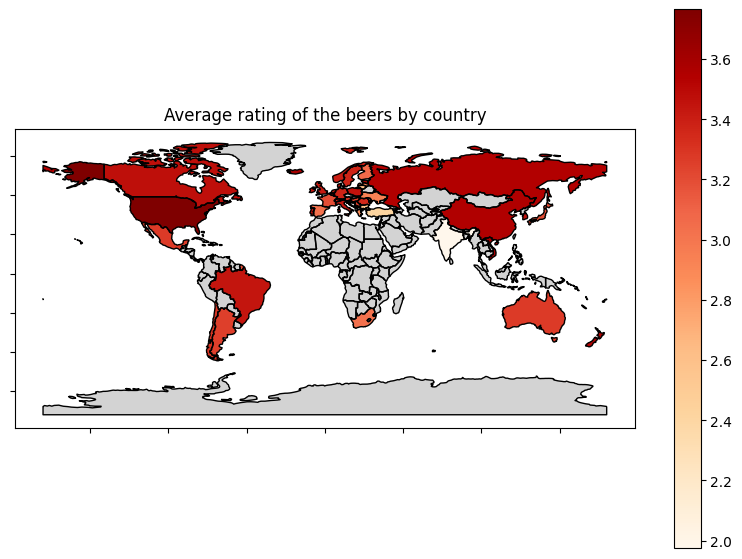

In [34]:
# Get a world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge the world map with the average ratings
world = world.merge(
    avg_ratings, left_on="name", right_on="brewery_location", how="left"
)

# Plot the map
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)
world.boundary.plot(ax=ax, linewidth=1, color="black")
world.plot(
    column="avg_rating",
    ax=ax,
    legend=True,
    cmap="OrRd",
    missing_kwds={"color": "lightgrey"},
)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.title("Average rating of the beers by country")
plt.show()

We see that only a small parts of the world still has data (all grey countries are the ones already removed from our analysis by preprocessing). We are therefore interested in which countries have the highest amount of beers.

In [35]:
# Print the countries with highest number of beers
num_unique_beers = num_unique_beers.sort_values(by="num_unique_beers", ascending=False)
num_unique_beers.head(20)

,brewery_location,num_unique_beers
102,"United States, California",3779
12,Canada,3237
27,England,2832
110,"United States, Illinois",1735
129,"United States, New York",1716
35,Germany,1548
6,Belgium,1473
89,Sweden,1346
135,"United States, Pennsylvania",1087
134,"United States, Oregon",1067


We notice that in the first 20 locations, only Australia is neither a state of the US nor a country in Europe. For this first look at the data we thus look into these two regions.

To do so, we restart from the data before mergin the US in one, and we found a map of the United States (https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html). We can then plot the average rating for each state on this map.

In [36]:
# Redoing the same but only for Europe and the US separately
united_states_ratings = country_ratings[
    country_ratings["brewery_location"].str.contains("United States")
]

avg_US_ratings = united_states_ratings.groupby("brewery_location")["rating"].mean()
avg_US_ratings = avg_US_ratings.to_frame().reset_index()
avg_US_ratings.columns = ["brewery_location", "avg_rating"]

names_states = avg_US_ratings["brewery_location"].unique()
# From each name remove "Unites Sates, "
names_states = [name.replace("United States, ", "") for name in names_states]
avg_US_ratings["brewery_location"] = names_states

# Load map from file
us_map = gpd.read_file("data/Maps/US/cb_2018_us_state_500k.shp")

us_map = us_map.merge(
    avg_US_ratings, left_on="NAME", right_on="brewery_location", how="right"
)


# For display purposes, move Alaska and Hawaii to the East
alaska = us_map[us_map["NAME"] == "Alaska"].geometry
hawaii = us_map[us_map["NAME"] == "Hawaii"].geometry

alaska = alaska.translate(xoff=40)
hawaii = hawaii.translate(xoff=40)

us_map_shifted = us_map.copy()
us_map_shifted.loc[us_map_shifted["NAME"] == "Alaska", "geometry"] = alaska
us_map_shifted.loc[us_map_shifted["NAME"] == "Hawaii", "geometry"] = hawaii

We also used our original map of the world to plot the average rating for each country in Europe. By keeping only countries in Europe.

In [37]:
# Get a world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

europe_map = world[world["continent"] == "Europe"]
europe_map = europe_map.merge(
    avg_ratings, left_on="name", right_on="brewery_location", how="left"
)

/var/folders/0g/yd41q8010pn2lvl2qx960v240000gn/T/ipykernel_7236/93497939.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


Finally here are the two maps:

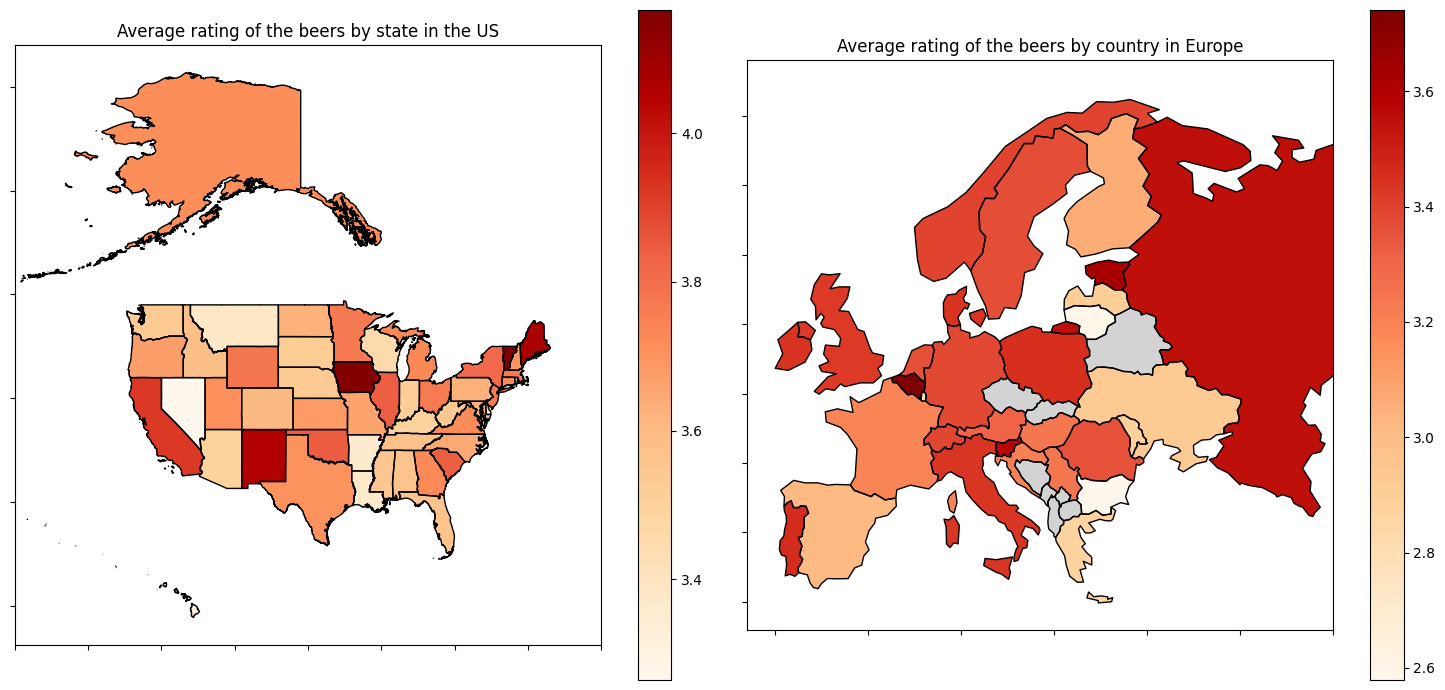

In [38]:
# Plot
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 7)

us_map_shifted.boundary.plot(ax=ax[0], linewidth=1, color="black")
us_map_shifted.plot(
    column="avg_rating",
    ax=ax[0],
    legend=True,
    cmap="OrRd",
    missing_kwds={"color": "lightgrey"},
)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_xlim(-140, -60)
ax[0].set_title("Average rating of the beers by state in the US")


europe_map.boundary.plot(ax=ax[1], linewidth=1, color="black")
europe_map.plot(
    column="avg_rating",
    ax=ax[1],
    legend=True,
    cmap="OrRd",
    missing_kwds={"color": "lightgrey"},
)
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_xlim(-13, 50)
ax[1].set_ylim(33, 74)
ax[1].set_title("Average rating of the beers by country in Europe")

plt.tight_layout()
plt.show()

We can observe that there is a difference in ratings from one place to another, and it seems interesting to look more into details in these statistics. We wish to look more in details for the different subcategories of ratings (Overall, Taste, Palate, Aroma, and Appearance) and try to see which of the differences are significant.

#### Word clouds

Then we will try to represent the beers of one country with a wordcloud made of the most used adjectives from the text reviews. For this we first need to do again some data cleaning. Before we kept the countries with more than 10 beers which have more than 10 reviews, but we did not care about text reviews, only the ratings. Here we need to do the same but looking at the text reviews, for the same reasons as stated above.

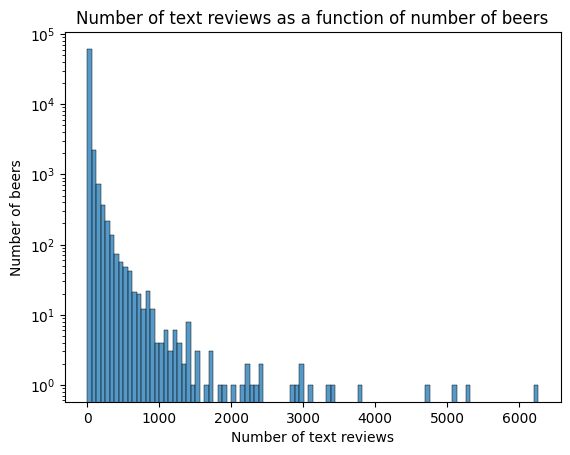

In [39]:
# Copy the dataset to avoid modifying the original
country_text_rev = reviews_df.copy()

# drop all the rows where there is no text review
country_text_rev = country_text_rev[country_text_rev["text"] != "nan"]

initial_len = len(country_text_rev)

nb_text_rev = country_text_rev.groupby("beer_name").count()

# plot number of text reviews for each beer
sns.histplot(data=nb_text_rev, x="text", bins=100)
plt.yscale("log")
plt.xlabel("Number of text reviews")
plt.ylabel("Number of beers")
plt.title("Number of text reviews as a function of number of beers")
plt.show()

In [40]:
# keep only the beers with at least 10 text reviews
nb_text_rev = nb_text_rev[nb_text_rev["text"] >= 10]
beers_to_keep = nb_text_rev.index
country_text_rev = country_text_rev[country_text_rev["beer_name"].isin(beers_to_keep)]

intermediate_len = len(country_text_rev)

print("Initial number of reviews: ", initial_len)
print("Intermediate number of reviews: ", intermediate_len)
print(
    "Percentage of reviews kept: {:.2f}%".format(intermediate_len / initial_len * 100)
)

Initial number of reviews:  1309663
Intermediate number of reviews:  1173522
Percentage of reviews kept: 89.60%


In [41]:
# We will now compute for each location the number of beer reviewed
num_unique_beers = country_text_rev.groupby("brewery_location")["beer_id"].nunique()
num_unique_beers = num_unique_beers.to_frame().reset_index()
num_unique_beers.columns = ["brewery_location", "num_unique_beers"]

print(
    "Number of countries initially: ",
    len(country_text_rev["brewery_location"].unique()),
)

# Keep only the countries with at least 10 unique beers
country_text_rev = country_text_rev.merge(num_unique_beers, on="brewery_location")
country_text_rev = country_text_rev[country_text_rev["num_unique_beers"] >= 10]

print(
    "Number of countries after filtering: ",
    len(country_text_rev["brewery_location"].unique()),
)
final_len = len(country_text_rev)

print("Initial number of reviews: ", initial_len)
print("Final number of reviews: ", final_len)
print("Percentage of reviews kept: {:.2f}%".format(final_len / initial_len * 100))

Number of countries initially:  151
Number of countries after filtering:  95
Initial number of reviews:  1309663
Final number of reviews:  1166793
Percentage of reviews kept: 89.09%


Now that we have cleaned the data to only keep countries with more than 10 different beers that have more than 10 reviews, we will show how we will implement the wordclouds.

To achieve this, we will be using some new python librairies :
<ul>
    <li> <em> spacy </em> : a library for advanced Natural Language Processing with which we will find adjectives in the text reviews </li>
    <li> <em> wordcloud </em> : a library to create wordclouds</li>
</ul>

First, we need to run the following commands in the terminal to install these librairies:

```bash
pip install spacy
python -m spacy download en_core_web_sm
pip install wordcloud
```

In [42]:
import spacy
import textwrap
import wordcloud

# load nlp model from spacy
nlp = spacy.load("en_core_web_sm")

In [43]:
# select first review



text = country_text_rev["text"].dropna().iloc[0]



# print first review neatly


wrapped_text = textwrap.fill(text, width=135)


print("First textual review: ", wrapped_text, sep="\n")

First textual review: 
This was a 12 oz bottle poured into a snifter.It pours a dark brown with some clarity but not truly transparent. It has a frothy head
with mild retention and low lacing. By far the best thing this beer has going for it is a truly amazing malty aroma that does not
dissapoint. If only the taste delivered the same punch. It has a mild malt taste and is followed by a metallic finish. This could be
due to being Ina bottle so I would try again on draft but it did let me down. The body is kind of weak with decent carbonation. I would
buy again if the price was right but it didn't strike me as awesome.


In [44]:
# find the adjetives in the review
doc = nlp(text)
adjectives = [token.lemma_ for token in doc if token.pos_ == "ADJ"]
print("Adjectives:", adjectives)

Adjectives: ['dark', 'transparent', 'frothy', 'mild', 'low', 'good', 'amazing', 'same', 'mild', 'metallic', 'due', 'weak', 'decent', 'right', 'awesome']


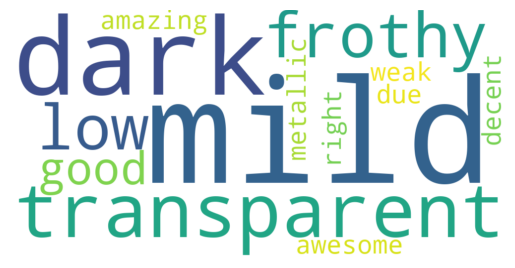

In [45]:
# Combine the strings into one text
text_combined = " ".join(adjectives)

# Create and generate a word cloud image:
wordcloud = wordcloud.WordCloud(
    width=1000, height=500, background_color="white"
).generate(text_combined)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In this example we can see that the model classified "due" as an adjective will it should be a verb. This is to be expected because all machine learning models will make mistakes sometimes. However as we will be finding the most used adjectives in all the reviews from one country so these mistakes will disappear when taking a large amount of reviews.

#### Climate analysis

We want to know wether the climate of the country influences the ratings of the beers. This could mean that the climate in which a beer is produced impacts its quality. Seen from the point of view of the users, this could mean that people from a specific climate zone prefer specific beers. 

To explore these hypotheses, we will be using a dataset describing the climate of the countries around the world. This dataset includes the Köppen climate classification (see https://en.wikipedia.org/wiki/K%C3%B6ppen_climate_classification) of the country, referred as climate zone here, and its average yearly temperature. The dataset comes from https://weatherandclimate.com/countries.

Describing a country with one climate zone is an oversimplification of the reality as countries usually have regions with very different climates within themselves. To minimize this, we will later on take a closer look at the United States of America (USA) and Europe as the USA can be broken down by states and Europe has countries that are smaller than in other parts of the world. Moreover, these two regions encompass a large amount of reviews, as shown before.

In [46]:
# load the dataset
countries_climate = pd.read_csv("data/climate_countries.csv")
countries_climate.head()

,Country,Climate zone,Avg °C
0,Afghanistan,DSB,15.70
1,Albania,CSB,15.17
2,Algeria,BWH,20.00
3,American Samoa,AW,28.00
4,Andorra,CFB,7.17


In [47]:
# replace the names of the countries in the climate dataset to match the names in the ratings dataset
countries_climate.loc[
    countries_climate["Country"].str.contains("United States"), "Country"
] = "United States of America"
countries_climate.loc[
    countries_climate["Country"].str.contains("Czechia"), "Country"
] = "Czech Republic"
countries_climate.loc[
    countries_climate["Country"].str.contains("Slovakia"), "Country"
] = "Slovak Republic"
countries_climate.loc[
    countries_climate["Country"].str.contains("Trinidad and Tobago"), "Country"
] = "Trinidad & Tobago"

In [48]:
# keep only the climate from the countries in the dataset
countries_climate = countries_climate[
    countries_climate["Country"].isin(avg_ratings.brewery_location.unique())
]

# print the countries in avg_ratings that are not in countries_climate
print(
    "Country for which there is no climate information: ",
    avg_ratings[~avg_ratings["brewery_location"].isin(countries_climate["Country"])][
        "brewery_location"
    ].iloc[0],
)

Country for which there is no climate information:  Bahamas


In [49]:
# Merge the world map with the climate data
world_climate = world.copy()
world_climate = world_climate.merge(
    countries_climate, left_on="name", right_on="Country", how="left"
)
# drop 'Country' column as 'world' already has country names in the column 'name'
world_climate = world_climate.drop(columns=["Country"])

# Merge with the average ratings
world_climate = world_climate.merge(
    avg_ratings, left_on="name", right_on="brewery_location", how="left"
)

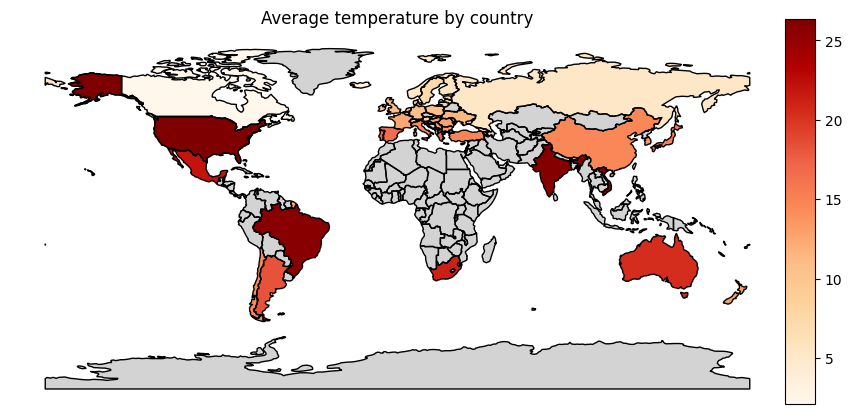

In [50]:
# Plot the map
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)
plt.title("Average temperature by country")
world_climate.boundary.plot(ax=ax, linewidth=1, color="black")
ax.set_axis_off()
world_climate.plot(
    column="Avg °C",
    ax=ax,
    legend=True,
    cmap="OrRd",
    missing_kwds={"color": "lightgrey"},
    cax=fig.add_axes([0.9, 0.23, 0.03, 0.55]),
)
plt.show()

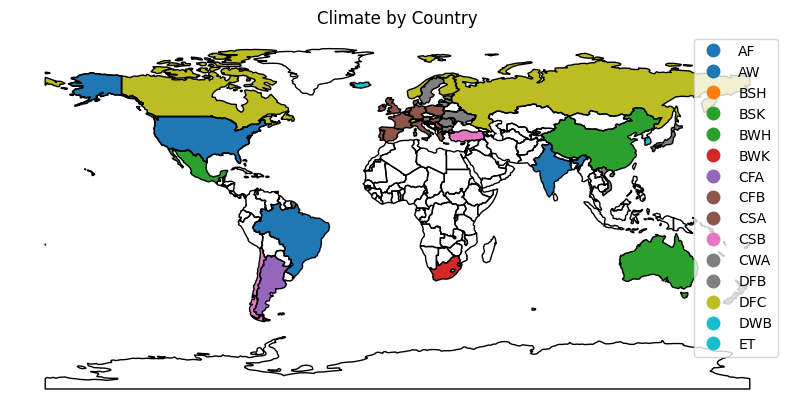

In [51]:
# plot the climate zones

# legend for climate zones
color_mapping = {
    "AF": (0, 0, 255),
    "AM": (0, 120, 255),
    "AW": (70, 170, 255),
    "BSH": (245, 165, 0),
    "BSK": (255, 220, 100),
    "BWH": (255, 0, 0),
    "BWK": (255, 150, 150),
    "CFA": (200, 255, 80),
    "CFB": (100, 255, 80),
    "CSA": (255, 255, 0),
    "CSB": (200, 200, 0),
    "CWA": (150, 255, 150),
    "CWB": (100, 200, 100),
    "DFB": (55, 200, 255),
    "DFC": (0, 125, 125),
    "DSB": (200, 0, 200),
    "DSC": (150, 50, 150),
    "DWB": (90, 120, 220),
    "EF": (102, 102, 102),
    "ET": (178, 178, 178),
}

# convert colors into rgba
for key, value in color_mapping.items():
    color_mapping[key] = (value[0] / 255, value[1] / 255, value[2] / 255)

world_climate["color"] = world_climate.loc[:, "Climate zone"].map(color_mapping)

fig, ax = plt.subplots(1, figsize=(10, 7))
plt.title("Climate by Country")
world_climate.boundary.plot(
    ax=ax, linewidth=1, color="black"
)  # Draw country boundaries
ax.set_axis_off()
world_climate.plot(column="Climate zone", ax=ax, legend=True)
plt.show()

Let's show again the map of the ratings as a reminder.

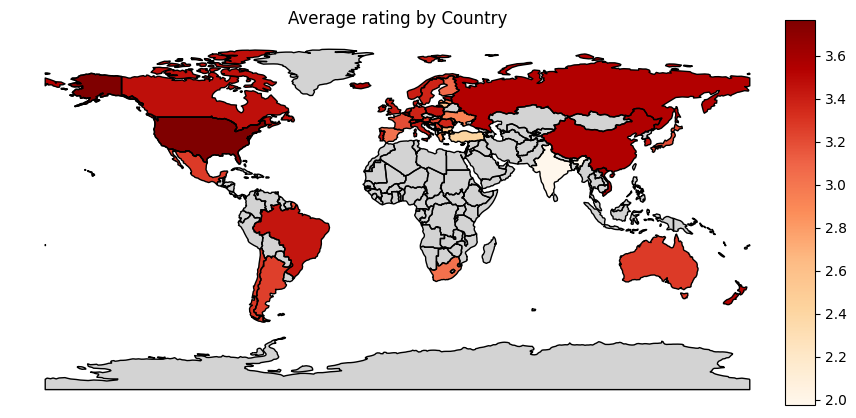

In [52]:
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.title("Average rating by Country")
world_climate.boundary.plot(
    ax=ax, linewidth=1, color="black"
)  # Draw country boundaries
ax.set_axis_off()
world_climate.plot(
    column="avg_rating",
    ax=ax,
    legend=True,
    cmap="OrRd",
    missing_kwds={"color": "lightgrey"},
    cax=fig.add_axes([0.9, 0.23, 0.03, 0.55]),
)
plt.show()

Looking at these maps we can see that there are differences but not a clear trend. This shows that it needs further analises to see wether or not there is a correlation between the climate of a country and the ratings of its beers. 

## 3) Second analysis : how users from one country rate beers

In this section we want to analyse the distribution of the users around the world. Furthermore, we want to look at the average rating of beers depending on the user's location.

### Data cleaning

To accomplish this, we first have to clean our data to increase the reliability of the analysis. We first decided to exclude all the users who have rated less than 10 beers, to avoid aberrant datapoints that might influence the overall average.

In [53]:
# Copy the dataset to avoid modifying the original
users_ratings = reviews_df.copy()

# Compute and print the number of users that have rated at least one beer
print("Initial number of unique users: ", len(users_ratings["user_id"].unique()))

# Compute and print the number of ratings given by users that have rated at least 10 beers
filtered_users_ratings = users_ratings.drop(
    users_ratings[users_ratings["user_nbr_ratings"] < 10].index
)
print(
    "Final number of unique users after filtering: ",
    len(filtered_users_ratings["user_id"].unique()),
)

# Compute the percentage of users kept
print(
    "Percentage of users kept: {:.2f} %".format(
        len(filtered_users_ratings["user_id"].unique())
        / len(users_ratings["user_id"].unique())
        * 100
    )
)

Initial number of unique users:  92113
Final number of unique users after filtering:  57409
Percentage of users kept: 62.32 %


After accomplishing this task, we group our data based on the users'location origin. Subsequently, we look at the user count per location, and for the same reason as before, we retain only those locations with a minimum of 10 users.

In [54]:
# Compute and print the number of users locations with at least one user
print(
    "Initial number of unique user locations: ",
    len(users_ratings["user_location"].unique()),
)

# Compute the total number of users per user location
# First, we drop the duplicates to not count twice the same user whitin the same location
unique_users_location = filtered_users_ratings.drop_duplicates(subset=["user_name"])

# Then, we group by user location and count the number of users
filtered_users_location = (
    unique_users_location.groupby("user_location")
    .agg({"user_name": "count"})
    .rename(columns={"user_name": "nbr_users"})
)

# Compute and print the number of users locations that have more than 10 users
filtered_users_location = filtered_users_location[
    filtered_users_location["nbr_users"] >= 10
].sort_values(by="nbr_users", ascending=False)
filtered_users_location = filtered_users_location.reset_index()
final_filtered_users = filtered_users_ratings[
    filtered_users_ratings["user_location"].isin(
        filtered_users_location["user_location"]
    )
]
print(
    "Final number of unique user locations after filtering: ",
    len(final_filtered_users["user_location"].unique()),
)

# Compute the percentage of users locations kept
print(
    "Percentage of users locations kept: {:.2f} %".format(
        len(final_filtered_users["user_location"].unique())
        / len(users_ratings["user_location"].unique())
        * 100
    )
)

Initial number of unique user locations:  198
Final number of unique user locations after filtering:  107
Percentage of users locations kept: 54.04 %


To verify that the location that have less taht 10 users have been correctly removed we check that 'Afghanistan' (user location), that only have 1 user, had been well removed from the initial dataframe.

In [55]:
##TEST
print(
    "Is Afghanistan present it the non-filtered dataframe?",
    "Afghanistan" in users_ratings["user_location"].values,
)
print(
    "Is Afghanistan present it the filtered dataframe?",
    "Afghanistan" in final_filtered_users["user_location"].values,
)

Is Afghanistan present it the non-filtered dataframe? True
Is Afghanistan present it the filtered dataframe? False


We now look at how the dataframe has changed from before-after the filtering:

In [56]:
print("Initial number of reviews: ", len(users_ratings))
print("Final number of reviews: ", len(final_filtered_users))
print(
    "Percentage of reviews kept: {:.2f}%".format(
        len(final_filtered_users) / len(users_ratings) * 100
    )
)

Initial number of reviews:  1976606
Final number of reviews:  1816244
Percentage of reviews kept: 91.89%


We notice that at the end of the filtering the 91.89% of the original dataset is mantained even if we removed ~40% of users when filtering the first time and ~45% of user locations the second time. This result is a good compromise to have enough significal results. 

In [57]:
# Here the resulting filtered dataset
final_filtered_users.head()

,beer_name,beer_id,style,date,user_name,user_id,appearance,aroma,palate,taste,...,beer_id_rb,brewery_id_rb,nbr_ratings_rb,beer_avg_rating_ba_rb,brewery_location,brewery_name,brewery_nbr_beers_ba,brewery_nbr_beers_rb,user_location,user_nbr_ratings
0,Legbiter,19827,English Pale Ale,1417431600,Hellpop65,hellpop65.48993,nan,nan,nan,nan,...,37923,4959,89,3.159695,Northern Ireland,Strangford Lough Brewing Company Ltd,5,5,"United States, Kansas",2326.0
2,Legbiter,19827,English Pale Ale,1393412400,RochefortChris,rochefortchris.697017,nan,nan,nan,nan,...,37923,4959,89,3.159695,Northern Ireland,Strangford Lough Brewing Company Ltd,5,5,"United States, North Carolina",1866.0
4,Legbiter,19827,English Pale Ale,1390647600,jaydoc,jaydoc.265507,nan,nan,nan,nan,...,37923,4959,89,3.159695,Northern Ireland,Strangford Lough Brewing Company Ltd,5,5,"United States, Kansas",9987.0
5,Legbiter,19827,English Pale Ale,1380794400,ejimhof,ejimhof.5743,nan,nan,nan,nan,...,37923,4959,89,3.159695,Northern Ireland,Strangford Lough Brewing Company Ltd,5,5,"United States, Pennsylvania",4078.0
6,Legbiter,19827,English Pale Ale,1366884000,GraduatedCashew,graduatedcashew.730089,nan,nan,nan,nan,...,37923,4959,89,3.159695,Northern Ireland,Strangford Lough Brewing Company Ltd,5,5,"United States, California",2329.0


### Analysis

Compute some averages for countries, plot them, say there are some diff so we want to investigate
Potentially also wordclouds, here because we explained the dataset in part 2, just say "we gonna do the same"

Now we want to investigate the average ratings of beers given by users sharing the same location of origin. As in the previous section, we use the average rating of each beer for now, it is itself the average across the 5 different scores (Overall, Taste, Palate, Aroma, and Appearance).

In [58]:
# Copy the dataset to avoid modifying the original
users_beers = final_filtered_users.copy()

# We group by user location and compute the number of users and the average rating of the beers
users_name_rating = (
    users_beers.groupby("user_location")
    .agg({"user_name": "count", "beer_avg_rating_ba_rb": "mean"})
    .rename(columns={"user_name": "nbr_users", "beer_avg_rating_ba_rb": "avg_rating"})
)
users_name_rating = users_name_rating.reset_index()
users_name_rating.head()

,user_location,nbr_users,avg_rating
0,Aotearoa,51,3.403685
1,Argentina,55,3.573264
2,Australia,18708,3.396380
3,Austria,2359,3.429830
4,Belgium,23460,3.470421


As it has been done before, we regroupe the United States and United Kingdom.

In [59]:
# copy the dataframe since we need it later
users_average_rating = users_name_rating.copy()

# Replace the country names by the official names
users_average_rating.loc[
    users_average_rating["user_location"].str.contains("United States"), "user_location"
] = "United States of America"
users_average_rating.loc[
    users_average_rating["user_location"].str.contains("England"), "user_location"
] = "United Kingdom"
users_average_rating.loc[
    users_average_rating["user_location"].str.contains("Scotland"), "user_location"
] = "United Kingdom"
users_average_rating.loc[
    users_average_rating["user_location"].str.contains("Wales"), "user_location"
] = "United Kingdom"
users_average_rating.loc[
    users_average_rating["user_location"].str.contains("Northern Ireland"),
    "user_location",
] = "United Kingdom"

/var/folders/0g/yd41q8010pn2lvl2qx960v240000gn/T/ipykernel_7236/299410093.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


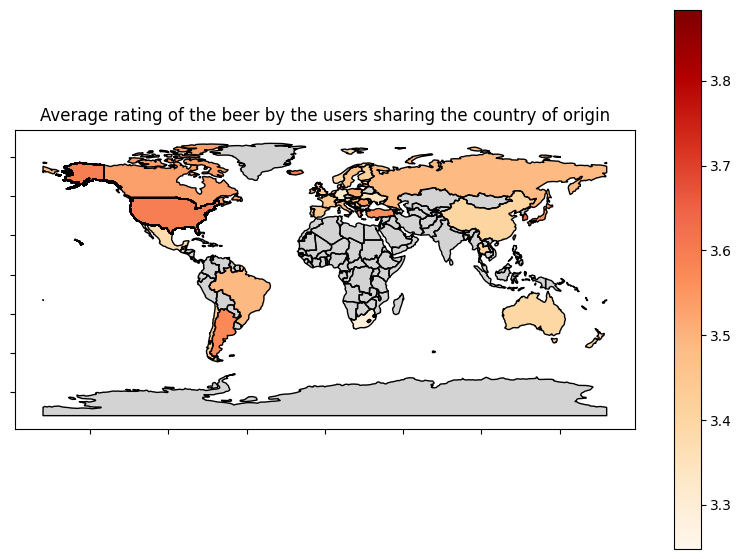

In [60]:
# Plot the results
# Get a world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge the world map with the users average ratings for each location
world = world.merge(
    users_average_rating, left_on="name", right_on="user_location", how="left"
)

# Plot the map
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)
world.boundary.plot(ax=ax, linewidth=1, color="black")
world.plot(
    column="avg_rating",
    ax=ax,
    legend=True,
    cmap="OrRd",
    missing_kwds={"color": "lightgrey"},
)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.title("Average rating of the beer by the users sharing the country of origin")
plt.show()

In [61]:
users_name_rating.sort_values(by="nbr_users", ascending=False).head(20)

,user_location,nbr_users,avg_rating
60,"United States, California",122116,3.792182
6,Canada,116346,3.532655
93,"United States, Pennsylvania",93766,3.730749
68,"United States, Illinois",87375,3.783682
87,"United States, New York",79280,3.803990
12,Denmark,73940,3.384505
98,"United States, Texas",63263,3.700941
14,England,63009,3.435270
76,"United States, Massachusetts",58914,3.862310
50,Sweden,53154,3.459103


From the above table we notice that the highest number of users are either in the United States or in Europe. For this reason, we now want to look more in detal into the distribution of the rating in this two regions. 

In [62]:
# Plot the same for Europe and US
users_us = users_name_rating[
    users_name_rating["user_location"].str.contains("United States")
]

names_states = users_us["user_location"].unique()
# From each name remove "Unites Sates, "
names_states = [name.replace("United States, ", "") for name in names_states]
users_us["user_location"] = names_states

# Load map from file
us_map = gpd.read_file("data/Maps/US/cb_2018_us_state_500k.shp")

us_map = us_map.merge(users_us, left_on="NAME", right_on="user_location", how="right")

# For display purposes, move Alaska and Hawaii to the East
alaska = us_map[us_map["NAME"] == "Alaska"].geometry
hawaii = us_map[us_map["NAME"] == "Hawaii"].geometry

# Shift Alaska to the right
alaska = alaska.translate(xoff=40)
hawaii = hawaii.translate(xoff=40)

us_map_shifted = us_map.copy()
us_map_shifted.loc[us_map_shifted["NAME"] == "Alaska", "geometry"] = alaska
us_map_shifted.loc[us_map_shifted["NAME"] == "Hawaii", "geometry"] = hawaii

/var/folders/0g/yd41q8010pn2lvl2qx960v240000gn/T/ipykernel_7236/3177115585.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_us["user_location"] = names_states


In [63]:
# Get a world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Keep only the countries in Europe
europe_map = world[world["continent"] == "Europe"]
europe_map = europe_map.merge(
    users_average_rating, left_on="name", right_on="user_location", how="left"
)

/var/folders/0g/yd41q8010pn2lvl2qx960v240000gn/T/ipykernel_7236/1887827692.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


All the necessary data are ready to be used to plot the two maps:

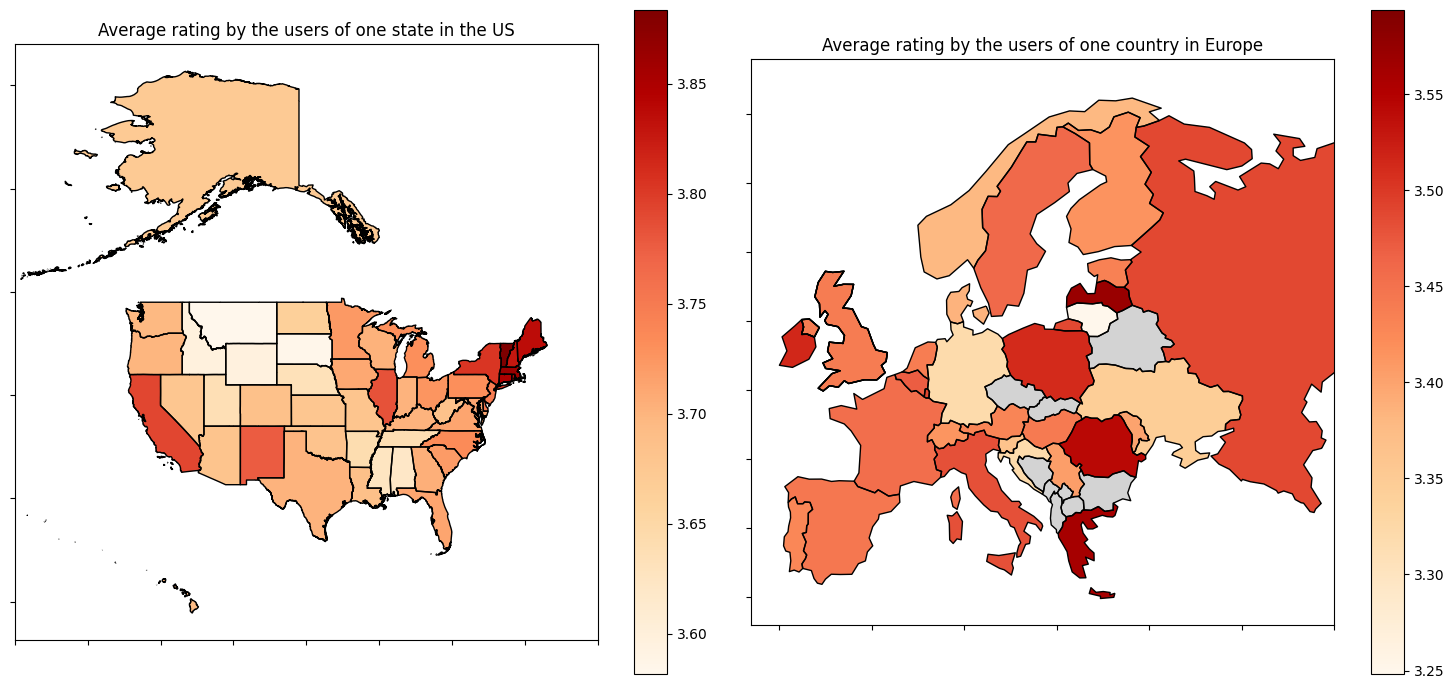

In [64]:
# Plot
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 7)

us_map_shifted.boundary.plot(ax=ax[0], linewidth=1, color="black")
us_map_shifted.plot(
    column="avg_rating",
    ax=ax[0],
    legend=True,
    cmap="OrRd",
    missing_kwds={"color": "lightgrey"},
)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_xlim(-140, -60)
ax[0].set_title("Average rating by the users of one state in the US")


europe_map.boundary.plot(ax=ax[1], linewidth=1, color="black")
europe_map.plot(
    column="avg_rating",
    ax=ax[1],
    legend=True,
    cmap="OrRd",
    missing_kwds={"color": "lightgrey"},
)
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_xlim(-13, 50)
ax[1].set_ylim(33, 74)
ax[1].set_title("Average rating by the users of one country in Europe")

plt.tight_layout()
plt.show()

We can observe variations in ratings among different states in the US and across various countries in Europe. Moving forward, it would be interesting to dive more in detail into the elements that that contribute to such diversity in average ratings. It would also be interesting to study how the climate of the user's location influences ratings. 

Here next we want to visualize in the world map where the majority of the users come from. To do so we want to plot the percentage of users of a determined location on the overall number of users.

In [65]:
# for each country compute the total number of users
users_per_country = (
    users_average_rating.groupby("user_location")
    .agg({"nbr_users": "sum"})
    .sort_values(by="nbr_users", ascending=False)
    .head(20)
)
users_per_country = users_per_country.reset_index()

# compute the total number of users
total_users = users_per_country["nbr_users"].sum()

# add a column percentage of users
users_per_country["percentage_users"] = (
    users_per_country["nbr_users"] / total_users * 100
)

users_per_country.head()

,user_location,nbr_users,percentage_users
0,United States of America,1206944,68.019531
1,Canada,116346,6.556891
2,United Kingdom,80429,4.532723
3,Denmark,73940,4.167024
4,Sweden,53154,2.995591


/var/folders/0g/yd41q8010pn2lvl2qx960v240000gn/T/ipykernel_7236/3974300705.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


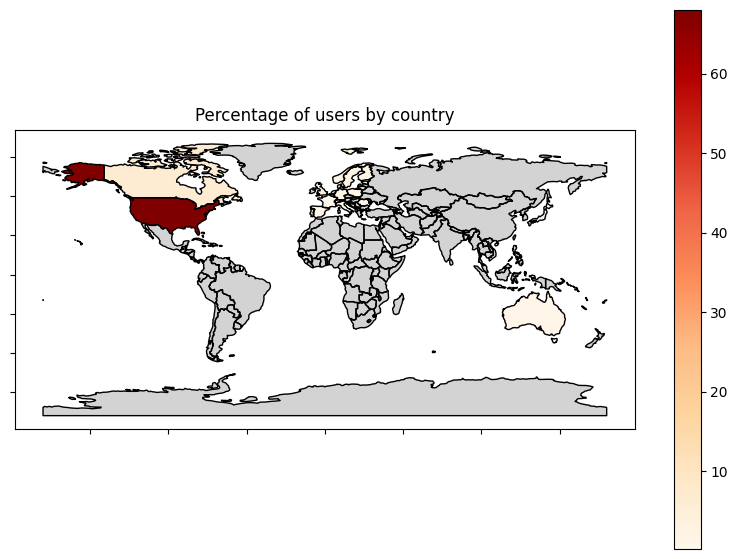

In [66]:
# Get a world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge the world map with the average ratings
world = world.merge(
    users_per_country, left_on="name", right_on="user_location", how="left"
)

# Plot the map
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)
world.boundary.plot(ax=ax, linewidth=1, color="black")
world.plot(
    column="percentage_users",
    ax=ax,
    legend=True,
    cmap="OrRd",
    missing_kwds={"color": "lightgrey"},
)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.title("Percentage of users by country")
plt.show()

We can observe that the highest number of users come from the United States, followed by the Europe. This is another important aspect that have to be considered in the future analysis. 

## Last analysis : how beers from one country are rated by users from another country

In [67]:
target_country = "Germany"

germany_df = final_filtered_users.copy()

germany_df = germany_df[germany_df.brewery_location == target_country]

print(len(germany_df))

80424


/var/folders/0g/yd41q8010pn2lvl2qx960v240000gn/T/ipykernel_7236/3601308450.py:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


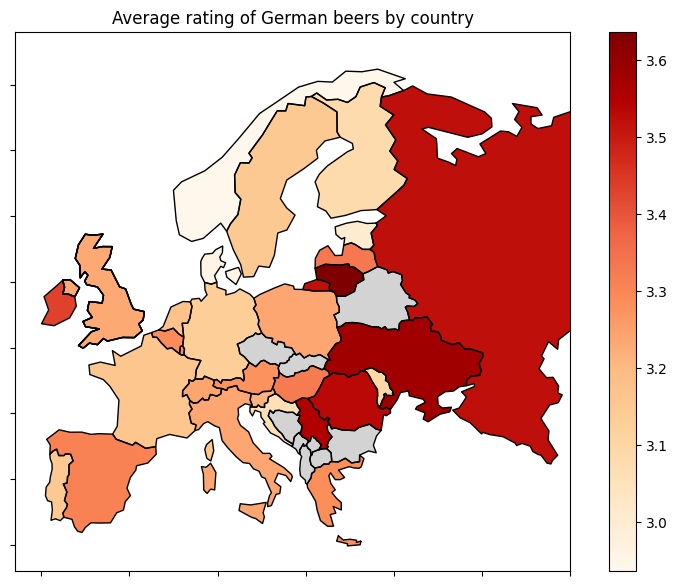

In [68]:
opinion_df = germany_df.copy()

opinion_df["rating"] = opinion_df["rating"].astype(float)
opinion_df = opinion_df.groupby("user_location")["rating"].mean()
opinion_df = opinion_df.to_frame().reset_index()
opinion_df.columns = ["user_location", "avg_rating"]

opinion_df.loc[
    opinion_df["user_location"].str.contains("United States"), "user_location"
] = "United States of America"
opinion_df.loc[
    opinion_df["user_location"].str.contains("England"), "user_location"
] = "United Kingdom"
opinion_df.loc[
    opinion_df["user_location"].str.contains("Scotland"), "user_location"
] = "United Kingdom"
opinion_df.loc[
    opinion_df["user_location"].str.contains("Wales"), "user_location"
] = "United Kingdom"
opinion_df.loc[
    opinion_df["user_location"].str.contains("Northern Ireland"), "user_location"
] = "United Kingdom"

# Plot
# Get a world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
europe_map = world[world["continent"] == "Europe"]
europe_map = europe_map.merge(
    opinion_df, left_on="name", right_on="user_location", how="left"
)

# Plot the map
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)
europe_map.boundary.plot(ax=ax, linewidth=1, color="black")
europe_map.plot(
    column="avg_rating",
    ax=ax,
    legend=True,
    cmap="OrRd",
    missing_kwds={"color": "lightgrey"},
)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(-13, 50)
ax.set_ylim(33, 74)
plt.title("Average rating of German beers by country")
plt.show()